In [ ]:

#!pip install matplotlib

import matplotlib.pyplot as pl
import os
import pandas as pd
import numpy as np
#!pip install openslide-bin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 82.3 MB/s eta 0:00:00


In [1]:
import os
import pandas as pd

slide_dir = "/rds/general/user/dla24/home/thesis/TGCA_dataset/all_slides"
data = []

for slidefile in os.listdir(slide_dir):
    if not slidefile.endswith(".svs"):
        continue
    slide_path = os.path.join(slide_dir, slidefile)
    # Get slide_id and patient_id
    slide_id = slidefile.split(".")[0]
    patient_id = "-".join(slide_id.split("-")[:3])
    data.append({"slide_path": slide_path, "slide_id": slide_id, "patient_id": patient_id})

df_slides = pd.DataFrame(data)
print(df_slides.head())


                                          slide_path                 slide_id  \
0  /rds/general/user/dla24/home/thesis/TGCA_datas...  TCGA-BP-5168-01Z-00-DX1   
1  /rds/general/user/dla24/home/thesis/TGCA_datas...  TCGA-B2-4099-01Z-00-DX1   
2  /rds/general/user/dla24/home/thesis/TGCA_datas...  TCGA-B0-4696-01Z-00-DX1   
3  /rds/general/user/dla24/home/thesis/TGCA_datas...  TCGA-B0-5710-01Z-00-DX1   
4  /rds/general/user/dla24/home/thesis/TGCA_datas...  TCGA-AK-3428-01Z-00-DX1   

     patient_id  
0  TCGA-BP-5168  
1  TCGA-B2-4099  
2  TCGA-B0-4696  
3  TCGA-B0-5710  
4  TCGA-AK-3428  


In [ ]:
df_clinical = pd.read_csv("/rds/general/user/dla24/home/thesis/TGCA_dataset/tcga_kirc_clinical_parsed.csv")
# Make sure IDs are formatted the same
df_slides['patient_id'] = df_slides['slide_id'].apply(lambda x: "-".join(x.split("-")[:3]))
df_clinical['patient_id'] = df_clinical['patient_id'].apply(lambda x: x.strip())  #cleaning whitespace


In [10]:
df_clinical.head()

,patient_id,vital_status,os_days,tumor_stage,tumor_grade,age_at_diagnosis
0,TCGA-B0-5088,Dead,563.0,Stage IIIB,NaN,NaN
1,TCGA-DV-A4W0,Alive,NaN,NaN,NaN,22109.0
2,TCGA-BP-4162,Alive,3074.0,Stage I,G2,23966.0
3,TCGA-BP-5174,Alive,2257.0,Stage I,G2,16693.0
4,TCGA-BP-4759,Alive,2372.0,Stage I,G2,18569.0


In [4]:
df_merged = df_slides.merge(df_clinical, on="patient_id", how="left")
print(df_merged.head())

                                          slide_path                 slide_id  \
0  /rds/general/user/dla24/home/thesis/TGCA_datas...  TCGA-BP-5168-01Z-00-DX1   
1  /rds/general/user/dla24/home/thesis/TGCA_datas...  TCGA-B2-4099-01Z-00-DX1   
2  /rds/general/user/dla24/home/thesis/TGCA_datas...  TCGA-B0-4696-01Z-00-DX1   
3  /rds/general/user/dla24/home/thesis/TGCA_datas...  TCGA-B0-5710-01Z-00-DX1   
4  /rds/general/user/dla24/home/thesis/TGCA_datas...  TCGA-AK-3428-01Z-00-DX1   

     patient_id vital_status  os_days tumor_stage tumor_grade  \
0  TCGA-BP-5168         Dead   1463.0         NaN         NaN   
1  TCGA-B2-4099        Alive    972.0     Stage I          G3   
2  TCGA-B0-4696         Dead    866.0   Stage III          G3   
3  TCGA-B0-5710        Alive      NaN         NaN         NaN   
4  TCGA-AK-3428        Alive   3728.0   Stage III          G2   

   age_at_diagnosis  
0               NaN  
1           30355.0  
2           21317.0  
3           22615.0  
4           

In [11]:
len(df_merged['patient_id'].unique())  # can start working with lots of patches of only 17 patients 

513

<Axes: title={'center': 'Vital Status Distribution'}, xlabel='vital_status'>

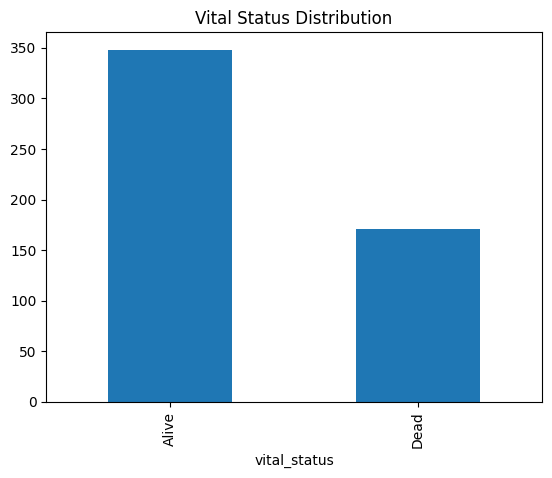

In [13]:
df_merged['vital_status'].value_counts().plot(kind='bar', title="Vital Status Distribution")


In [ ]:
# save the merged dataset 


df_merged = pd.DataFrame(df_merged)
df_merged.to_csv("/rds/general/user/dla24/home/thesis/TGCA_dataset/df_merged_allslides.csv", index=False)

In [20]:


patients = df_merged['patient_id'].unique()
np.random.seed(42)
np.random.shuffle(patients)

n_train = int(0.7 * len(patients))
n_val = int(0.15 * len(patients))

train_pats = patients[:n_train]
val_pats = patients[n_train:n_train+n_val]
test_pats = patients[n_train+n_val:]

df_train = df_merged[df_merged['patient_id'].isin(train_pats)]
df_val = df_merged[df_merged['patient_id'].isin(val_pats)]
df_test = df_merged[df_merged['patient_id'].isin(test_pats)]

df_train.to_csv("/rds/general/user/dla24/home/thesis/TGCA_dataset/train.csv", index=False)
df_val.to_csv("/rds/general/user/dla24/home/thesis/TGCA_dataset/val.csv", index=False)
df_test.to_csv("/rds/general/user/dla24/home/thesis/TGCA_dataset/test.csv", index=False)